# Santander Customer Satisfaction Prediction

Este notebook tem por objetivo analisar e prever se um dado cliente do Banco Santander está ou não satisfeito
com os serviços fornecidos pelo banco.

Primeiro nós vamos coletar os dados do site Kaggle: https://www.kaggle.com/c/santander-customer-satisfaction

Em seguida, vamos executar as seguites tarefas:

1- Limpeza dos dados;

2- Pré-processamento dos dadso;

3- Construção dos modelos;

4- Avaliação e seleção dos modelos;

In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("train.csv")
data.head(5)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


## Limpeza dos Dados

Nesta etapa iremos verificar e tratar os casos de valores nulos, atributos nulos, linhas duplicadas e etc.

In [3]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [4]:
data.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


### Valores Nulos


In [5]:
null_cols = list()
for column in data.columns:
    if data[column].isnull().any():
        null_cols.append(column)

null_cols

[]

Como podemos ver, não há nenhum valor nulo no nosso conjunto de dados. Entretanto, a note que em alguns
registros a variável "var3" é -999999. Vamos olhar essa variável mais de perto.

In [6]:
data.var3.value_counts()

 2         74165
 8           138
-999999      116
 9           110
 3           108
           ...  
 177           1
 87            1
 151           1
 215           1
 191           1
Name: var3, Length: 208, dtype: int64

In [7]:
print("Desconsiderando o valor de -999999, a variável 'var3' varia de {0} a {1}.".format(data[data['var3'] != -999999].var3.min(), data.var3.max()))

Desconsiderando o valor de -999999, a variável 'var3' varia de 0 a 238.


Podemos então considerar o valor -999999 como valor nulo. Como a maioria dos registros possuem 'var3 = 2',
é aceitável substituir -999999 por 2 em nosso conjunto de dados.

In [8]:
data.replace(to_replace=-999999, value=2, inplace=True)

### Atributos Nulos

Atributos nulos são aqueles que não agregam nenhum valor, ou seja, são atributos que possuem um valor
constante ao longo do conjunto de dados. Esses atributos precisam ser removidos.

In [9]:
for column in data.columns:
    if len(data[column].unique()) == 1:
        data.drop(labels=column, axis="columns", inplace=True)
        
data.shape

(76020, 337)

### Linhas Duplicadas

Vamos verificar se existem registros duplicados. Caso existam, vamos manter apenas o primeiro registro.

In [10]:
data.drop_duplicates(keep="first", inplace=True)
data.shape


(76020, 337)

Vamos verificar se existem registros iguais com valores 'TARGET' diferentes. Caso existam,
serão removidos.

In [11]:
duplicates = data.drop('TARGET', axis='columns').duplicated()
duplicates.unique()

array([False])

Um dos objetivos de um modelo 

Agora que nosso Dataset está devidamente "limpo", vamos entender como as variáveis se relacionam.


## Pré-processamento dos dados

### Normalização dos dados
Como temos dados em diferentes ordens de grandeza, vamos colocar todos os dados na mesma escala.

In [12]:
from sklearn.preprocessing import StandardScaler

x = data.drop(columns=["TARGET"])
y = data.TARGET

columns = x.columns

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=columns)

### Dados de treino e dados de teste
Vamos dividir nossos dados entre dados de treino e de teste.

In [13]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

x_train.shape, x_test.shape

((53214, 336), (22806, 336))

### SMOTE
Vamos verificar se os dados estão balanceados.

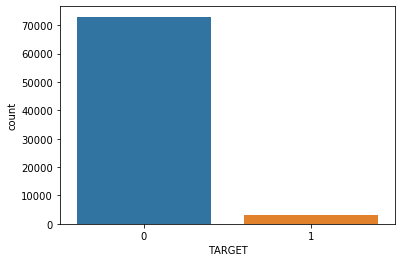

In [14]:
sns.countplot(x='TARGET', data=data)

Nota-se que existem miuto mais clientes satisfeitos do que clientes insatisfeitos. Esse desbalanceamento
pode induz o modelo. Sendo assim, vamos usar a técnica de SMOTE para rebalancear os dados.


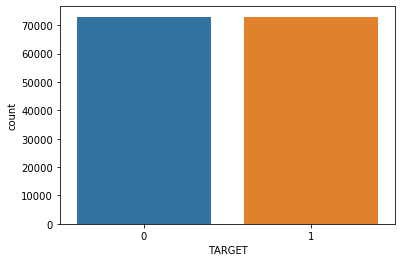

In [15]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
x, y = smote.fit_resample(x, y)

sns.countplot(x='TARGET', data=pd.DataFrame(y, columns=["TARGET"]))

### PCA
Temos um conjunto de dados com muitas variáveis. Como isso pode ser prejudicial para a performance do modelo,
vamos reduzir a dimensão do dataset usando PCA.

In [16]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
x = pca.fit_transform(x)
#x_test = pca.fit_transform(x_test)

x.shape

(146024, 10)

Agora que temos os dados de treino devidamente pré-processados, podemos treinar nosso modelo.

## Machine Learning
Vamos aplicar o modelo de regressão logística.

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

model = LogisticRegression()
cross_val_score(model, x, y, cv=10, scoring='accuracy').mean()

0.6775667309215722

In [18]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
cross_val_score(clf, x, y, cv=10, scoring='accuracy').mean()

0.8200504433164536

Com aproximadamente 82% de precisão, o modelo escolhido para o dado problema foi o Random Forest.
